**Ethan Seal and Cole Turner**

Fall 2019

CS343: Neural Networks

Project 1: Single layer networks

**FINAL DUE 11:59pm Thurs Sept 19**
- `binary_classification.ipynb`
- `adaline.py`
- `adaline_logistic.py`
- `binary_regression.ipynb` (this notebook)

**REMINDER**: Submit rubric on Google Classroom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2


def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = net.get_num_epochs()
    lr = net.get_learning_rate()
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE (lr={lr}, {n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()

**Paste in your code to load Old Faithful data with standardized features below**

In [2]:
old_faithful = pd.read_csv("old_faithful.csv")
old_faithful = old_faithful.to_numpy()

severe = old_faithful[:, 3]
old_faithful = old_faithful[:, 1:3]

old_faithful[:, 0] = (old_faithful[:,0] - old_faithful[:,0].mean()) / np.std(old_faithful[:, 0])
eruptions = np.expand_dims(old_faithful[:,0], axis = 1)
old_faithful[:, 1] = (old_faithful[:,1] - old_faithful[:,1].mean()) / np.std(old_faithful[:, 1])
waiting = old_faithful[:,1]


## Task 4) ADALINE for regression

Given ADALINE's linear (identity) activation and sum-of-squares loss function, the learned weights can be used for more than just classification. In this task, you will use ADALINE to perform a linear regression (the same neural network subsumes what you did in CS251!).

- **In the cell below**, train the ADALINE network to do a regression with `eruptions` as a predictor (standardized x value) and `waiting` (raw) as a response variable (y value) (i.e. use the former to predict the latter). I suggest using the standardized version of the predictor (otherwise you may run into numeric stability issues), but it's fine to use the raw/unstandardized response variable. Default hyperparameters should work well. To help set up the regression network training inputs, think about the regression equation: $y_i = m \times x_i + b$

**Tips:**
- **You shouldn't make any code changes to your `Adaline` class.**
- Think carefully about the design of your network: **How many input neurons do you need / how many weights do you need to learn the linear regression? What is each weight learning? What are the target values that the network is learning?**
- You may need to add a singleton dimension so that that you input ndarray has a defined dimension for Num Features. i.e. shape=(272,1), NOT shape=(272,)

Write your training code in the cell below.

In [3]:
net = Adaline()
loss, acc = net.fit(eruptions, waiting)



- **Have the cell below create a plot similar to the classification boundary one**, showing a scatter plot of the data and the overlayed regression line. Have the x-axis map onto standardized `eruptions` and y-axis onto raw `waiting` values.

**Tips**
- You will need to use the model linear equation to go from x values to predicted y values. $y_i = m \times x_i + b$
- Look at the class boundary plot code. You will need to generate linearly spaced x values before plotting your regression y values on your regression line. 

Write all your code in the cell below, which should output the scatter plot + regression line.

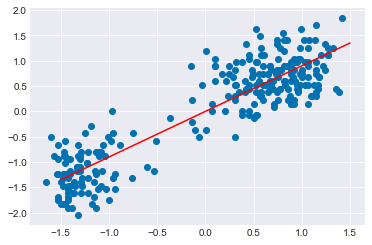

In [4]:
wts = net.get_wts()
x_i = np.linspace(-1.5,1.5)
y_i = wts[1]*x_i + wts[0]


def plot_regression(x_feat_std, y_feat_raw, x_i, y_i):
    plt.plot(x_feat_std, y_feat_raw, 'o', x_i, y_i, 'r-')
    plt.show()
    
plot_regression(old_faithful[:, 0],old_faithful[:, 1], x_i, y_i)

## Task 5) ADALINE and logistic regression

In this task, you will extend ADALINE to logistic regression, where we explicitly represent the probability of class membership.

For example data point $i$ is 80% likely to be in class A and 20% in class B.

**Remember:** Despite the name, logistic regression is actually about solving a **classification** problem. So this is more similar to Task 2 than Task 4.

### a. Logistic regression implementation

- Create a subclass of `Adaline` called `AdalineLogistic` in a new file called `adaline_logistic.py`. **Only override existing methods as needed to make the following changes. DO NOT MODIFY `adaline.py` FOR ANY REASON!!**.


1. Use the sigmoid activation function. $z = f(x) = \frac{1}{1+e^{-x}}$
2. Represent the output classes as 0 or +1. This should require a code change (activation values >=0.5 are classified as 1, otherwise class 0) and preprocessing of the old faithful data.
3. Use the cross-entropy loss function: $\sum_{i=1}^n \left [ -y_i Log(f(z_i)) - (1-y_i)Log(1 - f(z_i)) \right ] $
where $z_i$ is the activation to input sample $i$ and $y_i$ is the corresponding $i^{th}$ class label (0 or 1).
4. **In the cell below**, train your network using the standardized Old Faithful data. Default hyperparameters should work fine.
5. **In the cell below**, plot your loss and accuracy as a function of epoch.

#### Questions

11. Why did we need to relabel the classes from -1/+1 to 0/1?

#### Answers

11. Because the sigmoid function must use positive values. It has outputs from 0 to 1.

In [5]:
from adaline_logistic import AdalineLogistic

In [6]:


logistic_net = AdalineLogistic()


severe = np.where(severe>= 0,1,0)

loss, acc = logistic_net.fit(old_faithful[:,:], severe)



6. **In the cell below,** Plot the logistic regression decision boundary and the data (Use your code from Task 2).

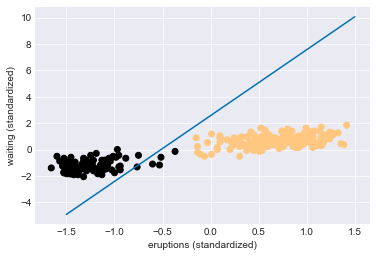

In [7]:
# lower and upper bounds for x values of decision curve when plotting in normalized coordinates
low, high = -1.5, 1.5

# getting new wts from log
wts = logistic_net.get_wts()

# Generate 50 equally spaced x-values that we will plug into the equation for the decision boundary curve
# to get the corresponding y-value on the curve
x_i = np.linspace(low, high)
# TODO: Compute y_i here
y_i = wts[1] * x_i + wts[0]

plt.scatter(eruptions, waiting, c=severe,
           cmap='copper')
plt.plot(x_i, y_i)
plt.xlabel('eruptions (standardized)')
plt.ylabel('waiting (standardized)')
plt.show()

### b. Test point probabilities

#### Questions

12. Determine the probability that the following test points belong to either class:

Format: standardized (eruptions, waiting)
- (0.4, 0.98)
- (0.5, -2)
- (-1, 0.5)

#### Answers

12. .999414, 
    .31367, 
    .27808

### c. Logistic regression on breast cancer diagnosis data

In this task, you will use your logistic regression network to classify more complex data. This is a dataset collected by the University of Wisconsin Hospitals, Madison by Dr. William H. Wolberg. Each data sample corresponds to a patient. There are 10 measured features measured from patients (clump thickness, uniformity of cell size, etc) and a binary class label: whether the patient was diagnosed with cancer. You're welcome to read more about the dataset if you are interested. 

Plotting pairs of features against one another revealed complex relationships. To compress the dimensionality, I performed PCA on the dataset. I saved off the top 4 PCA components and split the data into train and test sets. You're welcome to explore the raw data (download on Project page).

**Todo** in the cell below:

- Download the PCA cancer train and test data. 
- Import the data and the classes, and preprocess the data (standardize).
- Train the logistic regression network on the training set. **Plot the loss and accuracy across epochs below**.



In [8]:
train_data = 'breast-cancer-wisconsin_train.csv'
test_data = 'breast-cancer-wisconsin_test.csv'

def preprocess_data(filename, feats, class_var):
    '''Imports, standardizes, and returns data (x) and class labels (y).
    Parameters:
    -----------
    filename: str. filename of data to import.
    feats: list. List of strings of the features to import/preprocess/return
    class_var: str. Feature name of the class column.
    
    Returns:
    -----------
    x: standardized features. 
    y: Class labels
    '''
    
    train_data = pd.read_csv(filename).to_numpy()[1:, 1:]
    
    
    for i in range(train_data.shape[1]-1):
        train_data[:, i] = train_data[:,i] - train_data[:,i].mean() / np.std(train_data[:, i])
            
    train_labels = train_data[:,4]
    train_data = train_data[:,:4]
    
    return train_data, train_labels

train_data, train_labels = preprocess_data(train_data, ["pca_0", "pca_1", "pca_2", "pca_3"], "class")
test_data, test_labels = preprocess_data(test_data,["pca_0", "pca_1", "pca_2", "pca_3"], "class")

loss, acc = logistic_net.fit(train_data, train_labels)

print(acc[-1])

0.974025974025974


0.9688715953307393


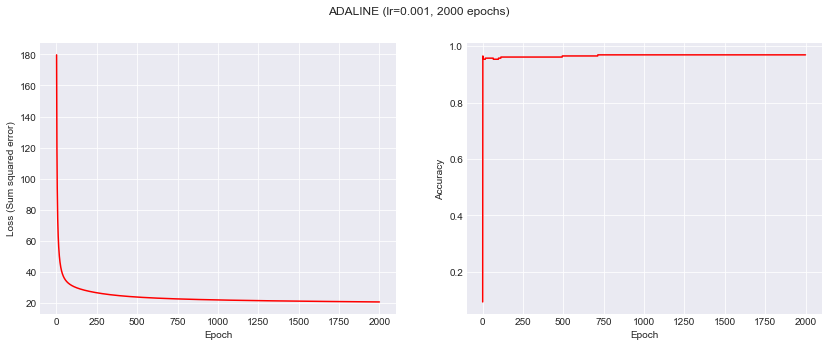

In [9]:
loss, acc = logistic_net.fit(test_data, test_labels)
print(acc[-1])

def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = net.get_num_epochs()
    lr = net.get_learning_rate()
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE (lr={lr}, {n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()
plot_adaline_train(logistic_net, loss, acc)

#### Questions

13. How accurately does ADALINE classify the cancer diagnoses on the test set? (**Provide the specific accuracy number**)

#### Answers

13. 96.9%, so quite accurately!

## Extensions

**NOTE:** Never integrate extensions into your base project so that it changes the expected behavior of core functions. It is better to duplicate the base project and add features from there.

1. Extend the ADALINE model to multi-class classification using the One-Vs-Rest (OvR) method. Recall that with this scheme, we train the network multiple times with each of the $n$ output classes serving as the +1 class (others set to 0 class). For example, for classes [a, b, c] would would train 3x with the following class labels: [1, 0, 0], [0, 1, 0], [0, 0, 1], respectively. We then classify based on the class that generates the highest max probability / activation value. Test it on a dataset with more than two classes (e.g. Iris). 
2. Create plots of the ADALINE regression after training on different numbers of epochs. One options is to plot all the curves in a single plot and establish a color scheme for time so that the viewer can visually discern the time sequence. Another possibility is to create a NxM grid of plots showing the progression (be sure to label the titles with #epochs).
3. Demonstrate how ADALINE can handle multiple linear regression.
4. Test the performance of single layer neural networks at classifying a binary class dataset of your choice. 